# Spam or Ham

ML Problem: text classification

Algorithms: Naive Bayes Classification

Data: [SMS Spam Collection Dataset](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



This application will define whether or not a text message is spam.

In [ ]:
# import relevant libraries
import numpy as np
import pandas as pd

### Reading and Cleaning the Data

In [2]:
# read csv file
spam = pd.read_csv('spam.csv', encoding='ansi')

In [3]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


After looking at the head of the dataset, we can notice something weird. There are three 'Unnamed' columns despite the Kaggle dataset only describing 2. Since most of these columns seems to be filled with NaN values, we will look at the rows with non-NaN values.

In [4]:
spam[spam['Unnamed: 2'].isna() == False].head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN


For some strange reason, some of the messages have split into multiple columns. To rectify this, we will combine all the columns after 'v1' into one column and drop the rest.

In [5]:
spam = spam.replace(np.nan, '')
spam['v2'] = spam['v2'] + spam['Unnamed: 2'] + spam['Unnamed: 3'] + spam['Unnamed: 4']
spam.drop(labels=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [6]:
spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Let's change the column names to something more meaningful while we're at it.

In [7]:
spam.rename(columns={'v1': 'spam', 'v2': 'text'}, inplace=True)

Now that it's a little cleaner, let's look at the info() and describe() evaluations.

In [8]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   spam    5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
spam.describe()

,spam,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Spam filters usually disregard punctuation, so let's do the same and remove punctuation from the texts.

In [10]:
import string

def remove_punc(text):
    '''Takes in a string and then removes the punctuation'''
    
    # create a set of excluded characters
    exclude = set(string.punctuation)
    
    # re-join the characters to form the text without punctuation
    no_punc = ''.join(char for char in text if char not in exclude)
    

    return no_punc    

In [11]:
spam_clean = pd.DataFrame.copy(spam)
spam_clean['text'] = spam_clean['text'].apply(remove_punc)

In [12]:
spam_clean

,spam,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like id ...


A lot of the words we see will be repeated in many of the text messages, but most of these words will hold no real significance other than grammatical correctness. These words are called stop words and we can use the Natural Language Toolkit to remove them. Note that we will also be tokenizing the words into a list. 

However, before we remove the stop words, let's visualize the dataframe first. We will add a length column that indicates how many words are in a given text message.

In [13]:
spam_clean['length'] = spam_clean['text'].apply(len)

In [14]:
spam_clean.head()

,spam,text,length
0,ham,Go until jurong point crazy Available only in ...,102
1,ham,Ok lar Joking wif u oni,23
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,149
3,ham,U dun say so early hor U c already then say,43
4,ham,Nah I dont think he goes to usf he lives aroun...,59


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ED76B6F40>,
      dtype=object)

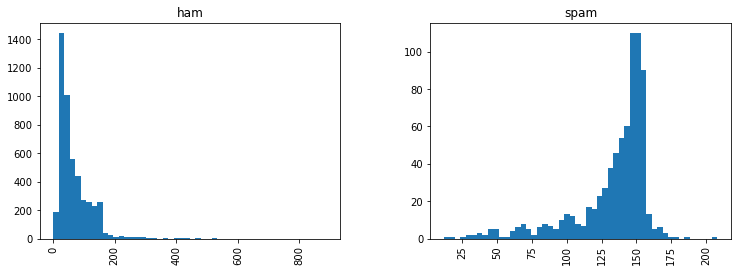

In [15]:
spam_clean.hist(column='length', by='spam', bins=50,figsize=(12,4))

'Ham' messages tend to be shorter while 'spam' messages tend to be longer. Notice the x axis, though. The most common lengths for spam tend to fall in the range of ham. This means that we can't rely solely on text length to determine if it's spam. 

Let's look at the most popular words in spam messages.

In [16]:
spam_words = {}
for message in spam_clean[spam_clean['spam'] == 'spam']['text'].values:
    for word in message:
        if len(word) > 1:
            if word not in spam_words:
                spam_words[word] = 1
            else:
                spam_words[word] += 1
spam_words = pd.DataFrame(spam_words.items(), columns=['word', 'count'])

In [17]:
spam_words.sort_values('count', ascending=False)

,word,count


Looks like spam messages include a lot of variations of the word 'call.'

Next, we'll remove the stop words from the text messages.

In [18]:
from nltk.corpus import stopwords

In [19]:
def remove_stop(text):
    '''Takes in a string and removes any stop words.'''
    
    return [word for word in text.split() if word.lower() not in stopwords.words('english')]

In [20]:
spam_clean['text'] = spam_clean['text'].apply(remove_stop)

In [21]:
spam_clean.head()

,spam,text,length
0,ham,"[Go, jurong, point, crazy, Available, bugis, n...",102
1,ham,"[Ok, lar, Joking, wif, u, oni]",23
2,spam,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin...",149
3,ham,"[U, dun, say, early, hor, U, c, already, say]",43
4,ham,"[Nah, dont, think, goes, usf, lives, around, t...",59


For future use, let's combine the remove_punc() and remove_stop() functions into one clean function.

In [22]:
def remove_filler(text):
    '''Takes a string and removes punctation and stop words.'''
    
    # create a set of excluded characters
    exclude = set(string.punctuation)
    
    # re-join the characters to form the text without punctuation
    no_punc = ''.join(char for char in text if char not in exclude)
    
    return [word for word in text.split() if word.lower() not in stopwords.words('english')]

### Vectorization, TF-IDF, and Training

We'll put all of these steps into one pipeline.

First, we'll vectorize our messages so that our machine learning model can actually use the data. We'll use a bag of words model to vectorize.

Second, we'll use the term frequency-inverse document frequency statistical measure.

Last, we'll apply a Naive Bayes Classifier to train our model.

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [24]:
pipeline = Pipeline([
    ('bag_of_words', CountVectorizer(analyzer=remove_filler)),
    ('tfidf', TfidfTransformer()),
    ('nb', MultinomialNB())
])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X = spam['text']
y = spam['spam']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function remove_filler at 0x0000022ED6BCD5E0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

### Evaluation

Finally, let's evaluate our model using a confusion matrix and a classification report.

In [28]:
predictions = pipeline.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
print(confusion_matrix(y_test, predictions))
print()
print(classification_report(y_test, predictions))

[[1592    0]
 [  94  153]]

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1592
        spam       1.00      0.62      0.77       247

    accuracy                           0.95      1839
   macro avg       0.97      0.81      0.87      1839
weighted avg       0.95      0.95      0.94      1839



### Conclusion

Our model was fairly precise at predicting both ham and spam. However, the recall for spam is somewhat lackluster. The overall F1-score is good for detecting ham and okay at detecting spam. In a practical sense, it is better for some spam to go through than for some real messages to end up in spam.